## Observations and Insights 

In [36]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os

# Study data files
mouse_metadata_path = os.path.join("data", "Mouse_metadata.csv")
study_results_path = os.path.join("data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
len(merged_data["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_data = merged_data.loc[merged_data.duplicated(["Mouse ID", "Timepoint"], keep = False)]
mouse_id = dup_mouse_data["Mouse ID"].unique()
print("Duplicate Mouse ID:" + mouse_id)

['Duplicate Mouse ID:g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop(merged_data.loc[merged_data["Mouse ID"] == "g989"].index)
clean_data.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
      
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
groupby_obj = clean_data.groupby("Drug Regimen")
tumor_volume = groupby_obj["Tumor Volume (mm3)"]
mean = tumor_volume.mean()
median = tumor_volume.median()
variance = tumor_volume.var()
std = tumor_volume.std()
SEM = tumor_volume.sem()
summary_tmr_vol = pd.DataFrame({"Mean": mean,
                                "Median": median,
                                "Variance": variance,
                                "Standard Deviation": std,
                                "SEM": SEM})
summary_tmr_vol   

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_tmr_vol_agg = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_tmr_vol_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

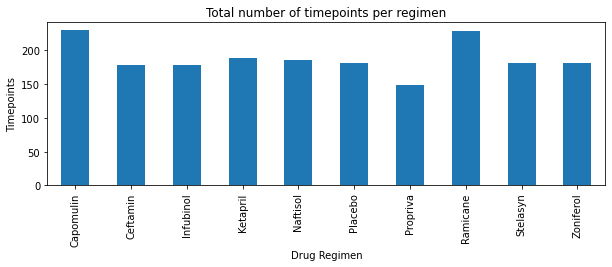

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_chart = groupby_obj["Timepoint"].count().plot(kind="bar", figsize=(10,3), title="Total number of timepoints per regimen")
bar_chart.set_ylabel("Timepoints");

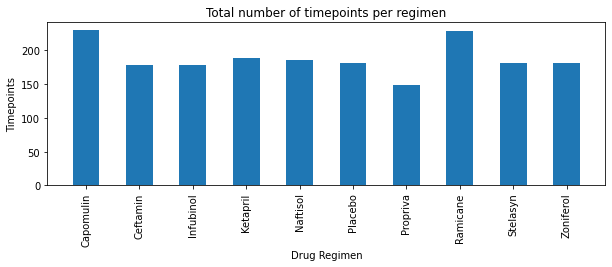

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = groupby_obj["Timepoint"].count().index.tolist()
y_axis = groupby_obj["Timepoint"].count().tolist()
plt.figure(figsize=(10,3))
plt.bar(x_axis,y_axis, width=.5)
plt.xticks(rotation='vertical');
plt.title("Total number of timepoints per regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints");

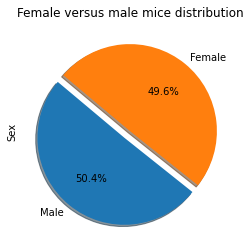

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_data[["Mouse ID", "Sex"]].drop_duplicates("Mouse ID")
explode = (0.1, 0)
gender_data["Sex"].value_counts().plot(kind="pie", title="Female versus male mice distribution", 
                                       explode=explode, autopct="%1.1f%%", shadow=True, startangle=140);

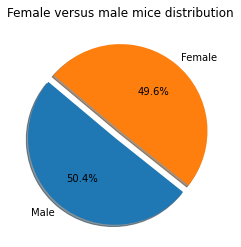

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_data["Sex"].value_counts().index.tolist()
sizes = gender_data["Sex"].value_counts().tolist()
plt.pie(sizes, explode=explode, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Female versus male mice distribution");

## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
groupby_regimen = clean_data.groupby("Mouse ID")
tmr_vol_df = pd.DataFrame(clean_data.loc[clean_data["Mouse ID"] == groupby_regimen["Mouse ID"]])# and 
                                         #clean_data["Timepoint"] == groupby_regimen["Timepoint"].max()])
#clean_data.loc[groupby_regimen[["Mouse ID","Timepoint"]]]
#tmr_vol_df["Last Tumor Volume"] = clean_data.loc[tmr_vol_df["Mouse ID", "Timepoint"], "Tumor Volume (mm3)"]
tmr_vol_df
#tmr_vol_data = clean_data.loc[groupby_regimen["Timepoint"].max(), ["Mouse ID", "Tumor Volume (mm3)"]]
#tmr_vol_data.rename(columns={"Tumor Volume (mm3)": "Final Tumor Volume"}, inplace=True)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#merged_tmr_vol_data = pd.merge(clean_data, tmr_vol_data, on="Mouse ID")
#clean_data.head(25)
#tmr_vol_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = clean_data["Drug Regimen"].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tmr_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

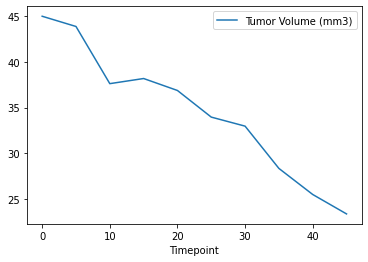

In [67]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capomulin = clean_data.loc[clean_data["Mouse ID"] == "s185", ["Timepoint", "Tumor Volume (mm3)"]]
mouse_capomulin.plot.line(x="Timepoint", y="Tumor Volume (mm3)")

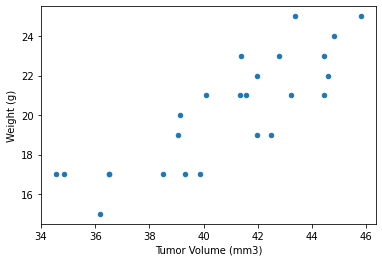

In [87]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#cap_regimen = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
grp_reg = clean_data.groupby(["Drug Regimen"]).get_group("Capomulin").groupby("Mouse ID").mean()
grp_reg.plot.scatter(x="Tumor Volume (mm3)", y="Weight (g)")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
